# In this notebook, we mainly do 10 analysis to better understand our data:
- Investigation into seemingly strange values
- A game process for example
- Yards distribution analysis
- Formation & Play Type analysis
- Formation & Yards analysis
- Down & Yards & Play Type analysis
- Down & Formation analysis
- Trend of different seasons
- Comparison of different teams
- ToGo (Yards to go) & Yards analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\zhong\Downloads\pbp_2016_2019_cleaned_data_updated.csv')
df

,GameId,GameDate,Quarter,Minute,Second,Remaining,OffenseTeam,DefenseTeam,Down,ToGo,...,Def_Pass_Y/A_rank,Def_Rush_Att_rank,Def_Rush_Yds_rank,Def_Rush_Y/G_rank,Def_Rush_Y/A_rank,Def_Rush_TD_rank,Off_Pass_Overall_rank,Off_Rush_Overall_rank,Def_Pass_Overall_rank,Def_Rush_Overall_rank
0,2016091102,2016/09/11,3,13,9,1689,HOU,CHI,1,15,...,3,3,2,2,3,3,3,3,2,3
1,2016091105,2016/09/11,2,1,32,1892,NO,OAK,2,10,...,4,2,2,2,4,3,1,3,2,2
2,2016091105,2016/09/11,2,1,11,1871,OAK,NO,1,10,...,4,2,1,1,2,3,1,2,4,2
3,2016091105,2016/09/11,2,1,26,1886,NO,OAK,3,4,...,4,2,2,2,4,3,1,3,2,2
4,2016091105,2016/09/11,3,2,38,1058,NO,OAK,2,1,...,4,2,2,2,4,3,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117733,2019091600,2019/09/16,3,12,49,1669,CLE,NYJ,1,10,...,2,2,1,1,1,2,3,3,3,1
117734,2019091509,2019/09/15,4,14,37,877,DAL,WAS,3,15,...,3,4,3,3,3,2,1,3,3,3
117735,2019091508,2019/09/15,3,9,18,1458,IND,TEN,3,1,...,2,2,2,2,2,2,3,2,3,2
117736,2019091503,2019/09/15,3,11,35,1595,GB,MIN,1,15,...,2,1,1,1,2,1,2,3,3,1


In [3]:
print(len(df.columns))
df.columns

102


Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'Remaining',
       'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo',
       ...
       'Def_Pass_Y/A_rank', 'Def_Rush_Att_rank', 'Def_Rush_Yds_rank',
       'Def_Rush_Y/G_rank', 'Def_Rush_Y/A_rank', 'Def_Rush_TD_rank',
       'Off_Pass_Overall_rank', 'Off_Rush_Overall_rank',
       'Def_Pass_Overall_rank', 'Def_Rush_Overall_rank'],
      dtype='object', length=102)

- We list descriptive statistics of each column to see if there're any abnormal values or values needed correction.
- Here we cover columns from 'Remaining' to 'Formation' because they include pre-play information.

In [4]:
df.columns[:38]

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'Remaining',
       'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine',
       'SeriesFirstDown', 'Description', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsChallenge', 'IsChallengeReversed', 'IsInterception',
       'IsFumble', 'IsPenalty', 'RushDirection', 'YardLineFixed',
       'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay',
       'PenaltyType', 'PenaltyYards', 'PointDiff', 'Off_Pass_Cmp',
       'Off_Pass_Att'],
      dtype='object')

# Investigation into seemingly strange values

- Belowed variables have nothing special.

In [5]:
# df['GameId'].describe()
# df['GameId'].unique()
# df['GameDate'].describe()
# df['GameDate'].unique()
# df['Minute'].describe()
# df['Second'].describe()

In [6]:
df['Quarter'].describe()
print(df['Quarter'].unique())    # Overtime = 5

[3 2 4 1 5]


Remaining: 
- Remaining stands for the <b>seconds</b> remining from current play to the end of game.  
- There're some negative values (e.g. min = -898), which are all in the 5th quarter. We correct them correspondingly.

In [7]:
df['Remaining'].describe()   # There're some negative values (e.g. min = -898), which are all in the 5th quarter.
# df[df['Remaining'] < 0]['Quarter'].unique()  

count    117738.000000
mean       1735.946619
std        1055.274056
min        -898.000000
25%         830.250000
50%        1800.000000
75%        2629.000000
max        3600.000000
Name: Remaining, dtype: float64

In [8]:
df['Remaining'] = np.where(df['Remaining'] < 0, 900 - df['Remaining'], df['Remaining'])
# df['Remaining'].describe()

Down: 
- 6 samples have 0 Down and are dropped

In [9]:
# df['Down'].describe()
# df['Down'].unique()  # 6 samples have 0 Down and are dropped
# df[df['Down'] == 0][['Down','ToGo','IsTouchdown']]

In [10]:
# df['Down'].describe()
df = df.drop(df[df['Down'] == 0].index)
# df['Down'].unique()

ToGo:
- Some plays do have 'ToGo' larger than 10 since the offense team were penalized before that play, thus earning backward yards
- If a team is penalized for consecutive times, chances are that the team has a really large ToGo. For example, if ToGo = 40 (10 + 15 + 15), the team is penalized for two consecutive times, with 15 backward yards at each time.
- We chose several example games where there were ToGo larger than 10 and compared the data to the game videos. We found that the large ToGo data was true and they were indeed because of various penalties during the game.

In [11]:
# df['ToGo'].describe()
# df = df.drop(df[df['Down'] == 0].index)
# df['ToGo'].unique()
df[df['ToGo'] > 10]

,GameId,GameDate,Quarter,Minute,Second,Remaining,OffenseTeam,DefenseTeam,Down,ToGo,...,Def_Pass_Y/A_rank,Def_Rush_Att_rank,Def_Rush_Yds_rank,Def_Rush_Y/G_rank,Def_Rush_Y/A_rank,Def_Rush_TD_rank,Off_Pass_Overall_rank,Off_Rush_Overall_rank,Def_Pass_Overall_rank,Def_Rush_Overall_rank
0,2016091102,2016/09/11,3,13,9,1689,HOU,CHI,1,15,...,3,3,2,2,3,3,3,3,2,3
6,2016091106,2016/09/11,2,12,55,2575,CIN,NYJ,2,11,...,3,2,1,1,1,2,3,3,3,1
13,2016091108,2016/09/11,2,12,53,2573,MIN,TEN,3,24,...,3,1,1,1,2,1,2,4,3,1
36,2016091800,2016/09/18,2,11,55,2515,SF,CAR,3,11,...,3,1,1,1,2,2,4,2,3,1
42,2016091801,2016/09/18,1,14,24,3564,CLE,BAL,2,11,...,2,1,1,1,1,1,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117710,2019092911,2019/09/29,2,4,22,2062,DEN,JAX,3,14,...,3,2,3,3,4,4,4,3,2,3
117711,2019092906,2019/09/29,2,6,56,2216,LAC,MIA,2,11,...,4,4,4,4,3,3,2,4,3,4
117718,2019092907,2019/09/29,4,11,1,661,WAS,NYG,2,21,...,4,3,2,2,2,3,4,4,3,3
117734,2019091509,2019/09/15,4,14,37,877,DAL,WAS,3,15,...,3,4,3,3,3,2,1,3,3,3


OffenseTeam: 

In [12]:
df['OffenseTeam'].unique()

array(['HOU', 'NO', 'OAK', 'CIN', 'PHI', 'CLE', 'MIN', 'TEN', 'CAR', 'NE',
       'NYJ', 'MIA', 'SEA', 'IND', 'SF', 'BAL', 'DET', 'NYG', 'DAL',
       'ARI', 'LAR', 'DEN', 'LAC', 'JAX', 'GB', 'CHI', 'BUF', 'WAS', 'TB',
       'PIT', 'KC', 'ATL'], dtype=object)

SeriesFirstDown:
- 4 plays consist of a 'Series'.If any one play has a yard larger than ToGo, it becomes the 'SeriesFirstDown'.
- From below we can see the difference of 'Yard' and 'ToGo' of 'SeriesFirstDown' play is indeed no less than zero.

In [13]:
df_yards_ToGo_diff = df[df['SeriesFirstDown']==1]['Yards'] - df[df['SeriesFirstDown']==1]['ToGo']
print(type(df_yards_ToGo_diff))
print('Min of df_yards_ToGo_diff is: ', df_yards_ToGo_diff.min())
print(df_yards_ToGo_diff.unique())

<class 'pandas.core.series.Series'>
Min of df_yards_ToGo_diff is:  0
[  0  15   3  12   2   8  19  65   1  57  10   6   5  18   7  13  14   4
  17  33  54  36  11  26   9  23  34  50  16  22  42  38  27  21  31  28
  40  25  24  39  35  44  30  29  20  51  43  56  49  41  32  55  47  52
  45  70  60  74  87  53  37  46  88  48  69  68  75  62  80  71  58  59
  83  86  82  64  91  96  85  61  67  78  63  77  97  66  84  94  95  92
 101  73  89  81  72  79  99]


RushDirection:

In [14]:
df['RushDirection'].unique()

array([nan, 'RIGHT GUARD', 'CENTER', 'LEFT END', 'RIGHT TACKLE',
       'LEFT TACKLE', 'RIGHT END', 'LEFT GUARD'], dtype=object)

Formation:
- We find there're four main formations. The rest three formations of 'Field Goal', 'Punt', and 'WILDCAT' together have 10 plays, which are so few. Considering our data is from the past three years, such few numbers of these three plays, which are not that rare in real games, mean our data might miss some plays of 'Field Goal', 'Punt', and 'WILDCAT'. Therefore, we decide not to analyze these three types.

In [15]:
df['Formation'].unique()

array(['SHOTGUN', 'UNDER CENTER', 'NO HUDDLE SHOTGUN', 'NO HUDDLE',
       'FIELD GOAL', 'WILDCAT', 'PUNT'], dtype=object)

In [16]:
# df[['Formation']].info()

In [17]:
df.groupby(['Formation']).size()
# Under Center: The quarterback (or another offensive player on occasion) lines up directly behind the center to take the snap. Sometimes referred to as standard formation (as opposed to shotgun formation).\
# The wildcat formation. In this formation a running back lines up in the quarterback position and runs the football. Although this formation is pretty much limited to running plays, there is an extra blocker for the runner as the quarterback is not in the backfield

Formation
FIELD GOAL               2
NO HUDDLE             2070
NO HUDDLE SHOTGUN     8681
PUNT                     3
SHOTGUN              64765
UNDER CENTER         42206
WILDCAT                  5
dtype: int64

As expected, WILDCAT is only used for Rush play.

In [18]:
df[df['Formation'] == 'WILDCAT'][['Formation','Down','IsPass','IsRush','IsIncomplete']]

,Formation,Down,IsPass,IsRush,IsIncomplete
17398,WILDCAT,1,0,1,0
17411,WILDCAT,1,0,1,0
36035,WILDCAT,1,0,1,0
69446,WILDCAT,1,0,1,0
110117,WILDCAT,1,0,1,0


As expected, Field Goal only happens in the 4th down.

In [19]:
df[df['Formation'] == 'FIELD GOAL'][['Formation','Down']]

,Formation,Down
403,FIELD GOAL,4
74392,FIELD GOAL,4


# A game process for example:
- Here we randomly choose three games and display all the rush and pass plays in time order. We use two colors, brown and green to represent Pass and Rush plays. In each type of play, we use light color to represent a positive-yard play and dark color to represent a negative-yard play.
- First, we notice that there're generally more pass plays (brown bars) than rush plays (green bars) in a NFL game.
- Then, we also find pass plays have larger yards than rush plays. Then average yard and the biggest yard of pass play are both larger than rush play. More specifically, a rush play seldom makes a play that is larger than 20 yards. This phenomenon makes sense because rushers are more easily to be tackled before they run a larger yard.
- Overal, a game has around 120 plays. There's a part of plays that's neither pass or rush (field goal, punt, etc.)

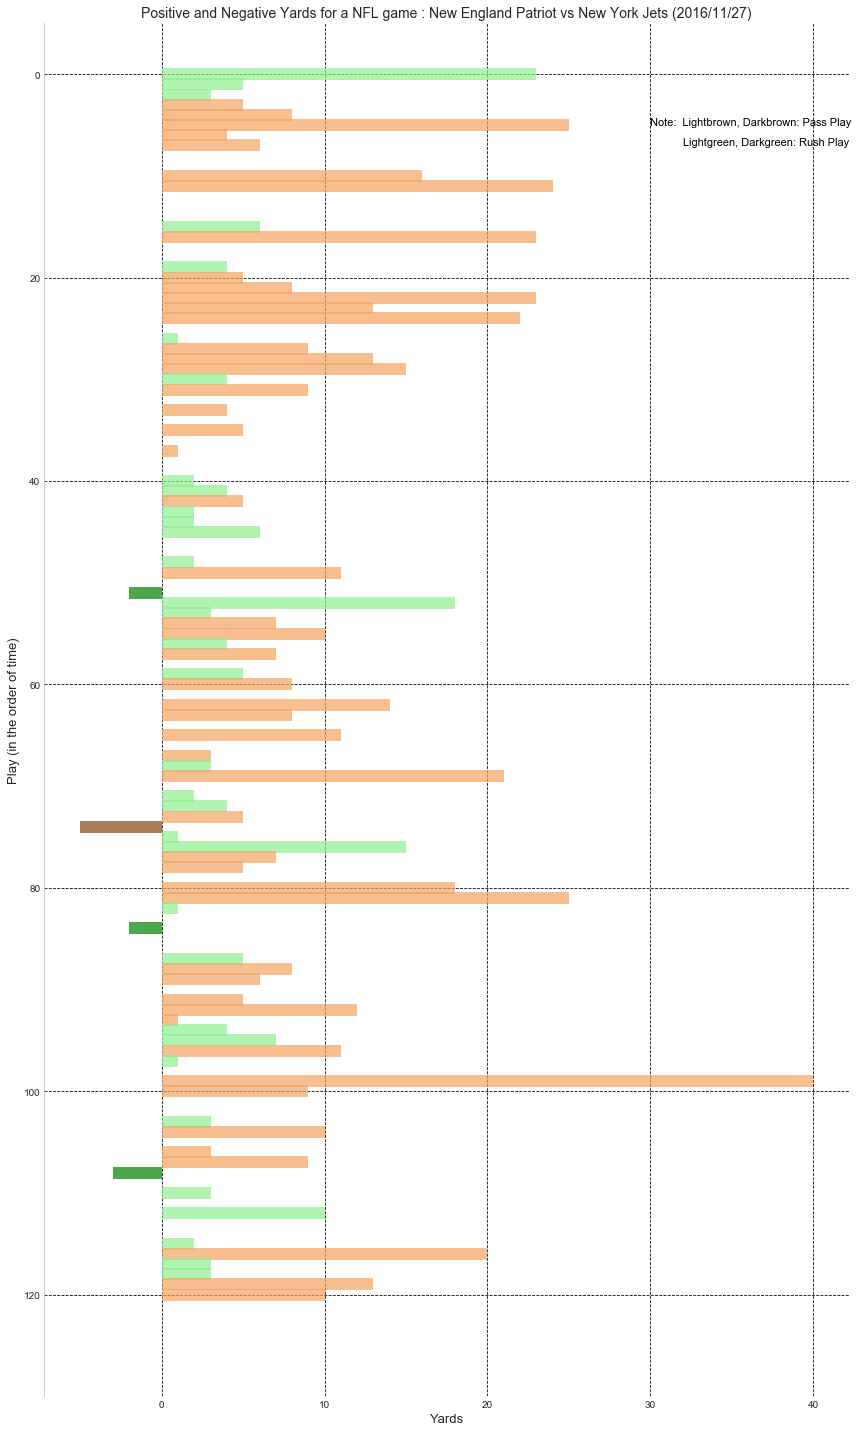

In [20]:
# New England Patriot vs New York Jets (2016/11/27)
plt.style.use('seaborn-whitegrid')
gameshow_df = df
gameshow_df = gameshow_df[gameshow_df['GameId'] == 2016112711]
gameshow_df = gameshow_df[['Remaining','Yards','IsRush','IsPass']]
gameshow_df['colors'] = np.where(gameshow_df['IsPass'] == 1,'sandybrown','green')
gameshow_df['colors'] = np.where((gameshow_df['IsPass'] == 1) & (gameshow_df['Yards'] < 0), 'saddlebrown', gameshow_df['colors'])
gameshow_df['colors'] = np.where(gameshow_df['IsRush'] == 1, 'lightgreen', gameshow_df['colors'])
gameshow_df['colors'] = np.where((gameshow_df['IsRush'] == 1) & (gameshow_df['Yards'] < 0), 'green', gameshow_df['colors'])
# gameshow_df
gameshow_df.sort_values('Remaining', inplace=True)
gameshow_df.reset_index(inplace=True)
plt.figure(figsize=(12,20))
plt.hlines(y=gameshow_df.index, xmin=-0, xmax=gameshow_df.Yards, color=gameshow_df.colors, alpha=0.7, linewidth=12)
plt.grid(linestyle='--', alpha=2.0, color = 'black')
plt.gca().set(ylabel='Play (In the order of time)', xlabel='Yards')
plt.yticks(fontsize=10)
plt.text(30, 5, r'Note:  Lightbrown, Darkbrown: Pass Play', {'color': 'black', 'fontsize': 11})
plt.text(32, 7, r'Lightgreen, Darkgreen: Rush Play', {'color': 'black', 'fontsize': 11})
plt.title('Positive and Negative Yards for a NFL game : New England Patriot vs New York Jets (2016/11/27)', fontdict={'size':14})
plt.xlabel('Yards', fontsize = 13)
plt.ylabel('Play (in the order of time)', fontsize = 13)
sns.despine(top=True, right=True, left=False, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.ylim(130,-5)
plt.show();

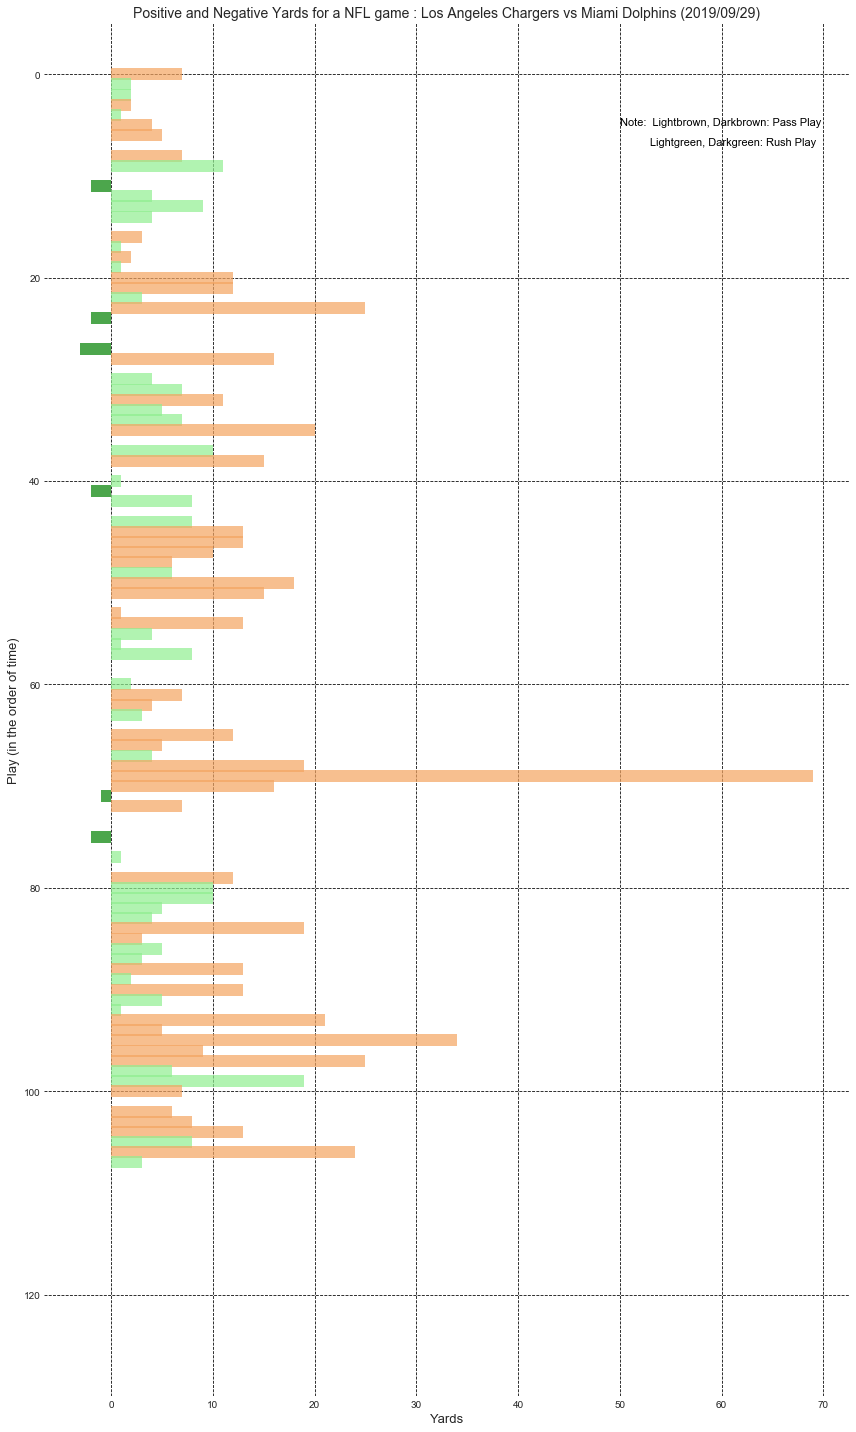

In [21]:
# Los Angeles Chargers vs Miami Dolphins (2019/09/29)
plt.style.use('seaborn-whitegrid')
game2show_df = df
game2show_df = game2show_df[game2show_df['GameId'] == 2019092906]
game2show_df = game2show_df[['Remaining','Yards','IsRush','IsPass']]
game2show_df['colors'] = np.where(game2show_df['IsPass'] == 1,'sandybrown','green')
game2show_df['colors'] = np.where((game2show_df['IsPass'] == 1) & (game2show_df['Yards'] < 0), 'saddlebrown', game2show_df['colors'])
game2show_df['colors'] = np.where(game2show_df['IsRush'] == 1, 'lightgreen', game2show_df['colors'])
game2show_df['colors'] = np.where((game2show_df['IsRush'] == 1) & (game2show_df['Yards'] < 0), 'green', game2show_df['colors'])
# game2show_df
game2show_df.sort_values('Remaining', inplace=True)
game2show_df.reset_index(inplace=True)
plt.figure(figsize=(12,20))
plt.hlines(y=game2show_df.index, xmin=0, xmax=game2show_df.Yards, color=game2show_df.colors, alpha=0.7, linewidth=12)
plt.grid(linestyle='--', alpha=2.0, color = 'black')
plt.gca().set(ylabel='Play (In the order of time)', xlabel='Yards')
plt.yticks(fontsize=10)
plt.text(50, 5, r'Note:  Lightbrown, Darkbrown: Pass Play', {'color': 'black', 'fontsize': 11})
plt.text(53, 7, r'Lightgreen, Darkgreen: Rush Play', {'color': 'black', 'fontsize': 11})
plt.title('Positive and Negative Yards for a NFL game : Los Angeles Chargers vs Miami Dolphins (2019/09/29)', fontdict={'size':14})
plt.xlabel('Yards', fontsize = 13)
plt.ylabel('Play (in the order of time)', fontsize = 13)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.ylim(130,-5)
plt.show();


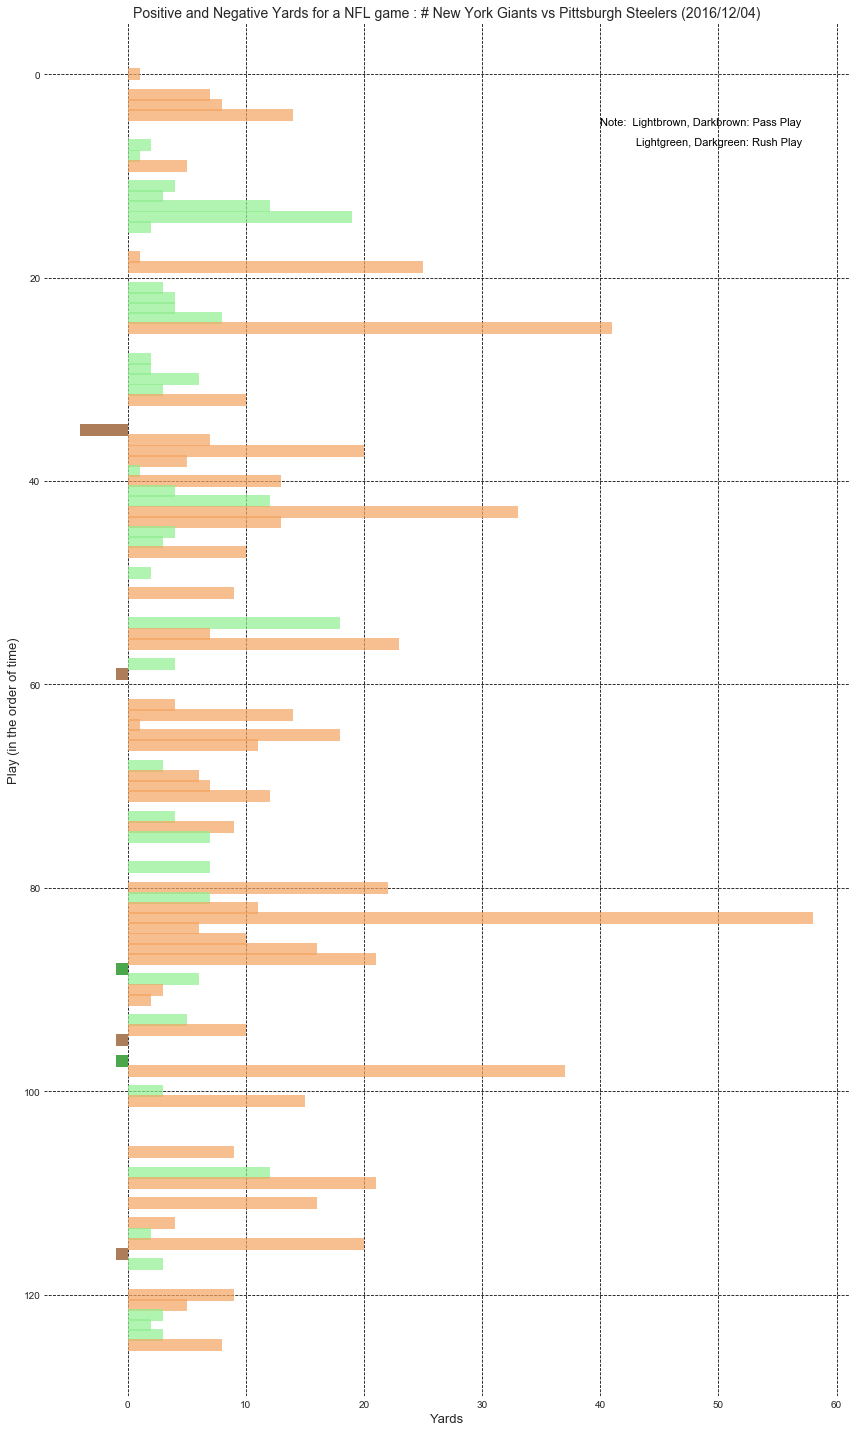

In [22]:
# New York Giants vs Pittsburgh Steelers (2016/12/04)
game3show_df = df
game3show_df = game3show_df[game3show_df['GameId'] == 2016120410]
game3show_df = game3show_df[['Remaining','Yards','IsRush','IsPass']]
game3show_df['colors'] = np.where(game3show_df['IsPass'] == 1,'sandybrown','green')
game3show_df['colors'] = np.where((game3show_df['IsPass'] == 1) & (game3show_df['Yards'] < 0), 'saddlebrown', game3show_df['colors'])
game3show_df['colors'] = np.where(game3show_df['IsRush'] == 1, 'lightgreen', game3show_df['colors'])
game3show_df['colors'] = np.where((game3show_df['IsRush'] == 1) & (game3show_df['Yards'] < 0), 'green', game3show_df['colors'])
# game3show_df
game3show_df.sort_values('Remaining', inplace=True)
game3show_df.reset_index(inplace=True)
plt.figure(figsize=(12,20))
plt.hlines(y=game3show_df.index, xmin=0, xmax=game3show_df.Yards, color=game3show_df.colors, alpha=0.7, linewidth=12)
plt.grid(linestyle='--', alpha=2.0, color = 'black')
plt.gca().set(ylabel='Play (In the order of time)', xlabel='Yards')
plt.yticks(fontsize=10)
plt.text(40, 5, r'Note:  Lightbrown, Darkbrown: Pass Play', {'color': 'black', 'fontsize': 11})
plt.text(43, 7, r'Lightgreen, Darkgreen: Rush Play', {'color': 'black', 'fontsize': 11})
plt.title('Positive and Negative Yards for a NFL game : # New York Giants vs Pittsburgh Steelers (2016/12/04)', fontdict={'size':14})
plt.xlabel('Yards', fontsize = 13)
plt.ylabel('Play (in the order of time)', fontsize = 13)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.ylim(130,-5)
plt.show();


# Yards distribution analysis
- We also notice there're seem to be really big yards. We plot the histogram of yards to see the distribution and have following findings.
- <b>Finding 1:</b> The yards of all play, rush play, and pass play are all right skewed distribution, meaning that the median is less than the mean.
- <b>Finding 2:</b> 0 yard is surprisingly the yard with the most frequency, which takes up around 1/4 of the whole plays. This means to get some yards in the NFL games is not as easy as we guess. Around 1 play out of 4 gets 0 yard forward. The game is somewhat INTENSE! 
- <b>Finding 3:</b> Also interesting to find the distribution of play is quite different bewteen Rush and Pass play type. Pass play has more spread yard distribution especially in large yards, but also has 26% 0 yard gained. Rush play has more concentrated distribution around [0,10], has fewer large yards gained but more negative yards than pass play.

Text(0,0.5,'Counts')

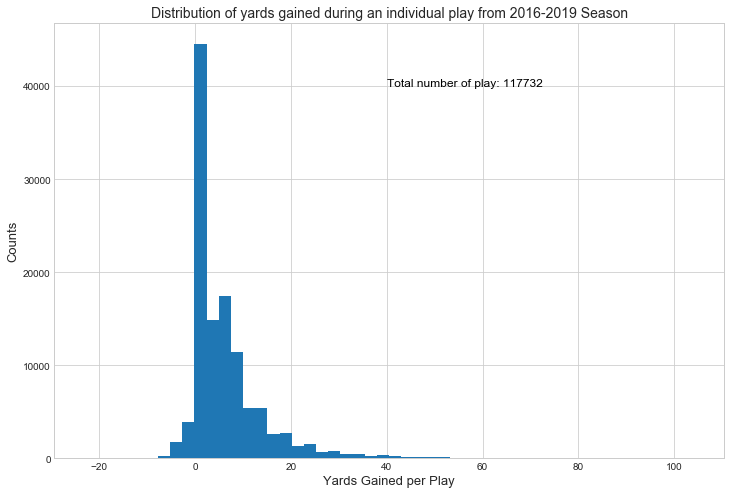

In [23]:
plt.figure(figsize=(12,8))
plt.hist(df['Yards'], bins = 50)
plt.text(40, 40000, r'Total number of play: %s' % len(df), {'color': 'black', 'fontsize': 12})
plt.title('Distribution of yards gained during an individual play from 2016-2019 Season',fontsize=14)
plt.xlabel('Yards Gained per Play', fontsize=13)
plt.ylabel('Counts', fontsize = 13)

- <b>A closer look at yard distribution</b>

In [24]:
import seaborn as sns
from decimal import *

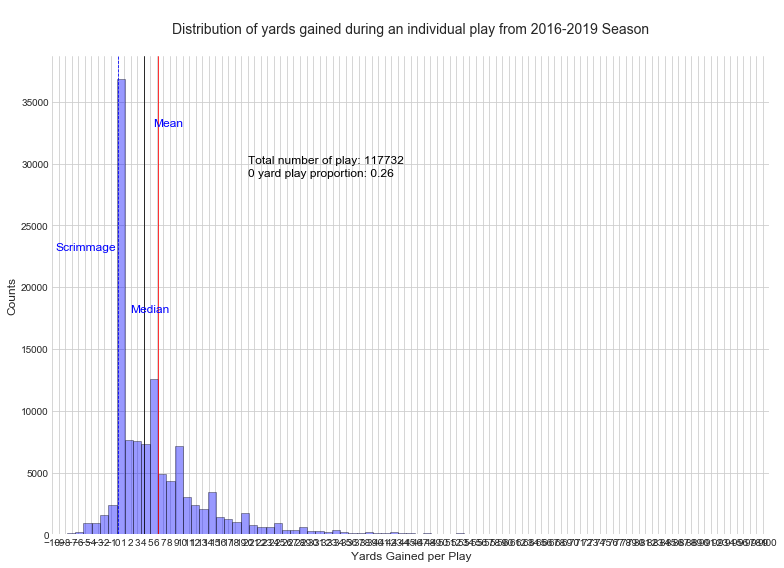

In [25]:
# sns.set_style("white", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(11,8))
ax.set_xlim(-10,100)

sns.distplot(df['Yards'], kde=False, color='b', bins=100, 
            hist_kws={"linewidth": .9, 'edgecolor':'black'})

plt.title('\nDistribution of yards gained during an individual play from 2016-2019 Season\n',fontsize=14)
plt.xlabel('\nYards Gained per Play \n', fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.axvline(x=0, color='blue', linestyle="--", linewidth=.8)
plt.text(-9.5, 23000, r'Scrimmage', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df['Yards'].mean(), color='red', linewidth=.8)
plt.text(2.0, 18000, r'Median', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df['Yards'].median(), color='black', linewidth=.8)
plt.text(5.5, 33000, r'Mean', {'color': 'blue', 'fontsize': 12})
plt.text(20, 30000, r'Total number of play: %s' % len(df), {'color': 'black', 'fontsize': 12})
plt.text(20, 29000, r'0 yard play proportion: %s' % str(round(len(df[df['Yards']==0])/len(df)*100)/100), {'color': 'black', 'fontsize': 12})
plt.xlabel('Yards Gained per Play', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.tight_layout()
plt.show();

Pass play: 
- Spread distribution, big rewards, more large yards gained
- Also risky, more 0 yards proportion if not a successful pass

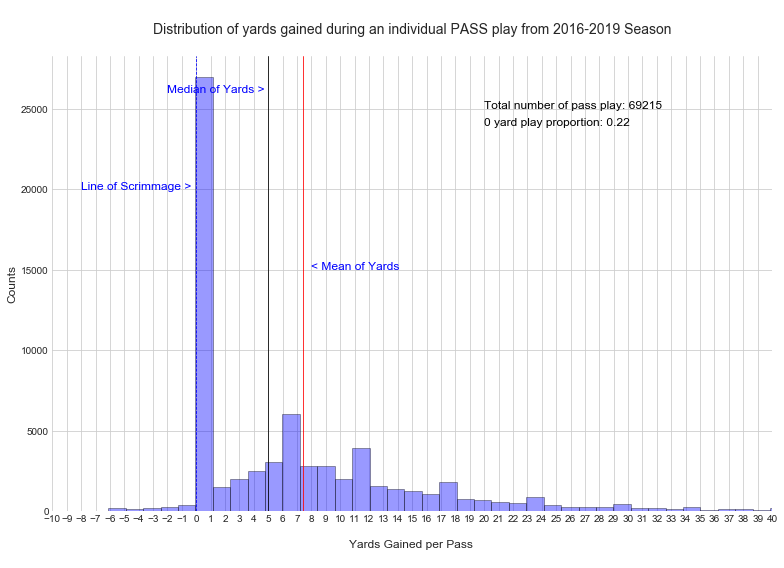

In [26]:
fig, ax = plt.subplots(figsize=(11,8))
ax.set_xlim(-10,40)

###ccc['colors'] = ['red' if x <= 0 else 'green' for x in ccc['Yards']]
###specialcolors = ['red' if x <= 0 else 'green' for x in tf.Yards]
# c = [ 'r' if i < 0 else 'b' for i in tf.Yards]

sns.distplot(df[df['IsPass'] == 1]['Yards'], kde=False, color='b', bins=100, 
            hist_kws={"linewidth": .9, 'edgecolor':'black'})

plt.title('\nDistribution of yards gained during an individual PASS play from 2016-2019 Season\n',fontsize=14)
plt.xlabel('\nYards Gained per Pass \n', fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.axvline(x=0, color='blue', linestyle="--", linewidth=.8)
plt.text(-8.0, 20000, r'Line of Scrimmage >', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df[df['IsPass'] == 1]['Yards'].mean(), color='red', linewidth=.8)
plt.text(8.0, 15000, r'< Mean of Yards', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df[df['IsPass'] == 1]['Yards'].median(), color='black', linewidth=.8)
plt.text(-2.0, 26000, r'Median of Yards >', {'color': 'blue', 'fontsize': 12})
plt.text(20, 25000, r'Total number of pass play: %s' % len(df[df['IsPass']==1]), {'color': 'black', 'fontsize': 12})
plt.text(20, 24000, r'0 yard play proportion: %s' % str(round(len(df[(df['Yards']==0) & df['IsPass']==1])/len(df['IsPass']==1)*100)/100), {'color': 'black', 'fontsize': 12})
plt.ylabel('Counts', fontsize = 12)
plt.tight_layout()
plt.show();

Rush play: 
- More concentrated distribution from around -7 to 20, fewer big yards gained, more small yards gained
- Also risky, more negative yards proportion compared to pass play

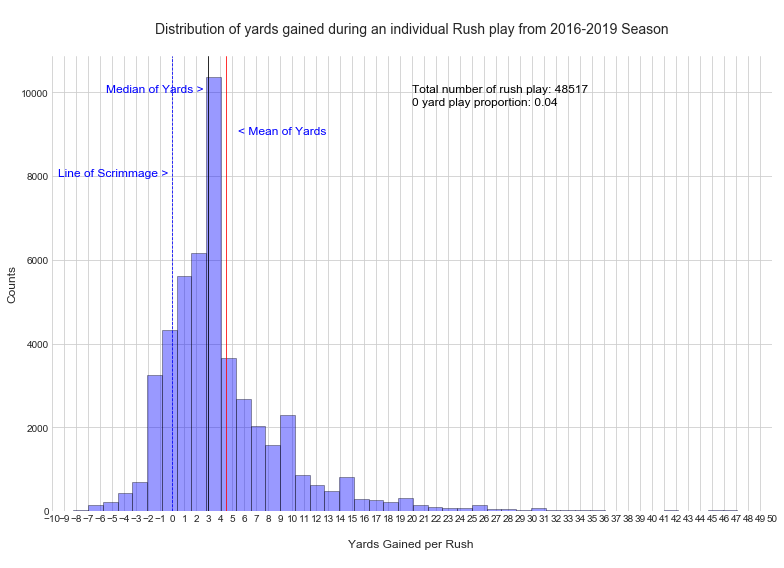

In [27]:
fig, ax = plt.subplots(figsize=(11,8))
ax.set_xlim(-10,50)

sns.distplot(df[df['IsRush'] == 1]['Yards'], kde=False, color='b', bins=100, 
            hist_kws={"linewidth": .9, 'edgecolor':'black'})

plt.title('\nDistribution of yards gained during an individual Rush play from 2016-2019 Season\n',fontsize=14)
plt.xlabel('\nYards Gained per Rush \n', fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.axvline(x=0, color='blue', linestyle="--", linewidth=.8)
plt.text(-9.5, 8000, r'Line of Scrimmage >', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df[df['IsRush'] == 1]['Yards'].mean(), color='red', linewidth=.8)
plt.text(5.5, 9000, r'< Mean of Yards', {'color': 'blue', 'fontsize': 12})
plt.axvline(x=df[df['IsRush'] == 1]['Yards'].median(), color='black', linewidth=.8)
plt.text(-5.5, 10000, r'Median of Yards >', {'color': 'blue', 'fontsize': 12})
plt.text(20, 10000, r'Total number of rush play: %s' % len(df[df['IsRush']==1]), {'color': 'black', 'fontsize': 12})
plt.text(20, 9700, r'0 yard play proportion: %s' % str(round(len(df[(df['Yards']==0) & df['IsRush']==1])/len(df['IsRush']==1)*100)/100), {'color': 'black', 'fontsize': 12})
plt.ylabel('Counts', fontsize = 12)
plt.tight_layout()
plt.show();

Extremely large yards play: 
- There're indeed plays with extreme large yards. We list them here and check by video that these plays did happen. The plays are crazy and exciting.

In [28]:
df[df['Yards']>90][['GameDate','Quarter','Minute','Second','OffenseTeam','DefenseTeam','Yards','IsRush','IsPass']]

,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Yards,IsRush,IsPass
6868,2016/09/11,3,8,3,NO,OAK,98,0,1
20824,2016/11/06,1,1,21,BAL,PIT,95,0,1
29992,2016/11/20,2,3,23,ARI,MIN,100,0,1
31203,2016/12/11,4,11,0,CAR,LAC,100,0,1
41117,2017/10/29,3,3,15,PIT,DET,97,0,1
42936,2017/11/12,3,9,36,LAR,HOU,94,0,1
52507,2017/09/17,4,1,12,DAL,DEN,103,0,1
61641,2017/12/10,4,2,55,LAC,WAS,96,0,1
67607,2018/12/02,4,4,20,SF,SEA,98,0,1
69539,2018/11/18,2,2,38,WAS,HOU,101,0,1


<b>Question: why so many 0 yards?</b>
- We find that 0 yards have quite many 'IsIncomplete' == 1 records. Such records are all Pass play.
- According to WiKipedia, 'Incomplete pass' refers to a legal forward pass that hits the ground before a player on either team gains possession. For example, if the quarterback throws the ball to one of his wide receivers, and the receiver either does not touch it or tries to catch it unsuccessfully, it is ruled as an incomplete pass. An incomplete pass causes the down to advance by one and the offensive team gains no yards.
- Therefore, we can conclude that high incomplete pass play (around 20%) results in a large number of 0 yard play.



In [29]:
print(len(df[(df['IsIncomplete']==1) & (df['IsPass']==1)]))
print(len(df[(df['IsIncomplete']==1)]))
print('Incomplete pass proportion: ', len(df[(df['IsIncomplete']==1)])/len(df))

24798
24798
Incomplete pass proportion:  0.21063092447253084


In [30]:
df[df['Yards']==0][['IsPass','PlayType','PlayType', 'IsRush', 'IsPass', 'IsIncomplete','IsTouchdown', 'PassType', 'IsChallenge','IsChallengeReversed','IsInterception', 'IsFumble','IsPenalty', 'RushDirection', 'YardLineFixed', 'YardLineDirection','IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType','PenaltyYards', 'PointDiff']].describe()
# df[(df['IsIncomplete']==1)]['Yards'].describe()

,IsPass,IsRush,IsPass,IsIncomplete,IsTouchdown,IsChallenge,IsChallengeReversed,IsInterception,IsFumble,IsPenalty,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards,PointDiff
count,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000,30120.000000
mean,0.856541,0.143459,0.856541,0.815903,0.000266,0.005246,0.000830,0.018825,0.008001,0.115007,28.760325,0.100133,0.095385,1.052556,-2.605578
std,0.350547,0.350547,0.350547,0.387570,0.016295,0.072238,0.028798,0.135908,0.089093,0.319035,13.117009,0.300182,0.293751,4.119169,10.428411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-49.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,-8.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,66.000000,44.000000


We also notice some 'IsTouchdown' data is 1, which seems strange considering the yard of this play is 0. We checked the description of these play and found that these plays were all reviewed by referees and the results were actually changed. Similarly, some 'IsIncomplete' data is 1 while 'Yards' aren't 0. We checked the description of these play and found that these plays were all reviewed by referees and the results were actually changed.
- To simplify our analysis, we drop such 'inconsistent' samples.

In [31]:
df = df.drop(df[((df['Yards'] == 0) & (df['IsTouchdown'] == 1)) | \
                    ((df['IsIncomplete']==1) & (df['IsPass']==1) & (df['Yards'] != 0))].index)

- Nothing was printed since we already dropped them.

In [32]:
for i in range(len(df[(df['Yards'] == 0) & (df['IsTouchdown'] == 1)]['Description'])):
    print(df[(df['Yards'] == 0) & (df['IsTouchdown'] == 1)]['Description'].iloc[i])
    print('\n')
# df[(df['IsIncomplete']==1) & (df['IsPass']==1) & (df['Yards'] == 0)]['Yards'].describe()

In [33]:
for i in range(len(df[(df['IsIncomplete']==1) & (df['IsPass']==1) & (df['Yards'] != 0)]['Description'])):
    print(df[(df['IsIncomplete']==1) & (df['IsPass']==1) & (df['Yards'] != 0)]['Description'].iloc[i])
    print('\n')

# Formation Analysis ：Formation & Play Type
- We analyze formation because it could be highly correlated with choosing a Pass or Rush play.
- Though the formation categorization in our dataset is a relatively broad, that is, only four main formations, we still try to find something useful from it.
- According to NFL reviews, Shotgun is more likely to PASS while Under Center is more likely to RUN.
- Also notice that the playtype of NO HUDDLE SHOTGUN is similar to that of SHOTGUN, the playtype of NO HUDDLE is simialr to that of UNDER CENTER.

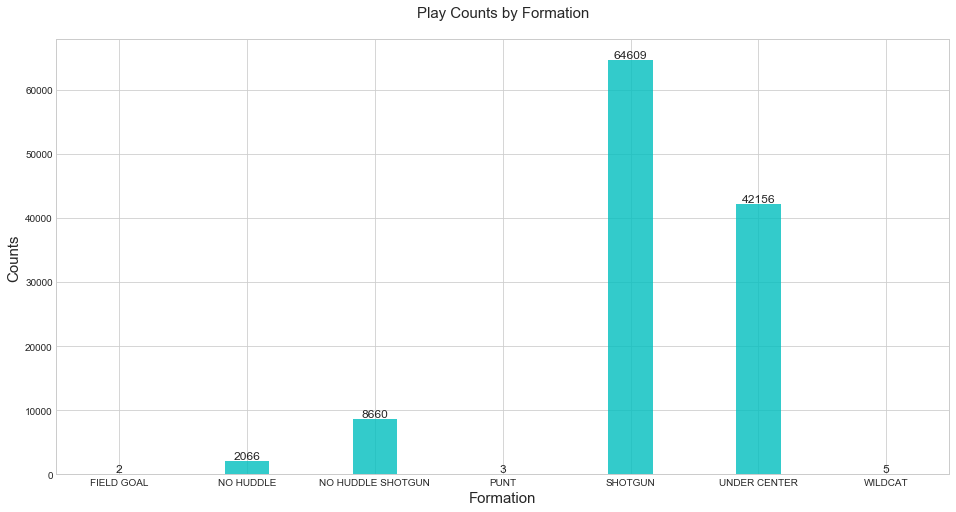

In [34]:
formation_group = df.groupby('Formation')
x = np.array(formation_group.size().index)
y = np.array(formation_group.size().values)
# fg = formation_group.size().plot(kind = 'bar',figsize=(12,8), color = 'c')
plt.figure(figsize=(16,8))
plt.bar(x, y,width = 0.35, align='center',color = 'c',alpha=0.8)
plt.xlabel('Formation', size = 15)
plt.ylabel('Counts', size = 15)
plt.title('Play Counts by Formation\n', fontsize=15)
for formation,count in zip(x,y):
    plt.text(formation, count+0.5, '%.0f' % count, ha='center', va= 'bottom',fontsize=12)

In [35]:
# formation_group.size() # pandas series
# for foramtion, count in zip(formation_group):
for x,y in zip(formation_group.size().index,formation_group.size().values):
    print(x,y)
    

FIELD GOAL 2
NO HUDDLE 2066
NO HUDDLE SHOTGUN 8660
PUNT 3
SHOTGUN 64609
UNDER CENTER 42156
WILDCAT 5


In [36]:
main_formation = ['NO HUDDLE', 'NO HUDDLE SHOTGUN', 'SHOTGUN', 'UNDER CENTER']
pass_count = np.arange(4)
rush_count = np.arange(4)
# pass_count
a = 0
for f in main_formation:
    pass_count[a] = df[df['Formation'] == f].groupby('IsPass').size().loc[1]
    rush_count[a] = df[df['Formation'] == f].groupby('IsPass').size().loc[0]
    a += 1
# print(pass_count)
# print(rush_count)
data1 = {'IsPass': pass_count,'IsRush': rush_count}
# data1
df_formation_pass = pd.DataFrame(index = main_formation, columns = ['IsPass','IsRush'], data = data1)
df_formation_pass

,IsPass,IsRush
NO HUDDLE,828,1238
NO HUDDLE SHOTGUN,6731,1929
SHOTGUN,48022,16587
UNDER CENTER,13405,28751


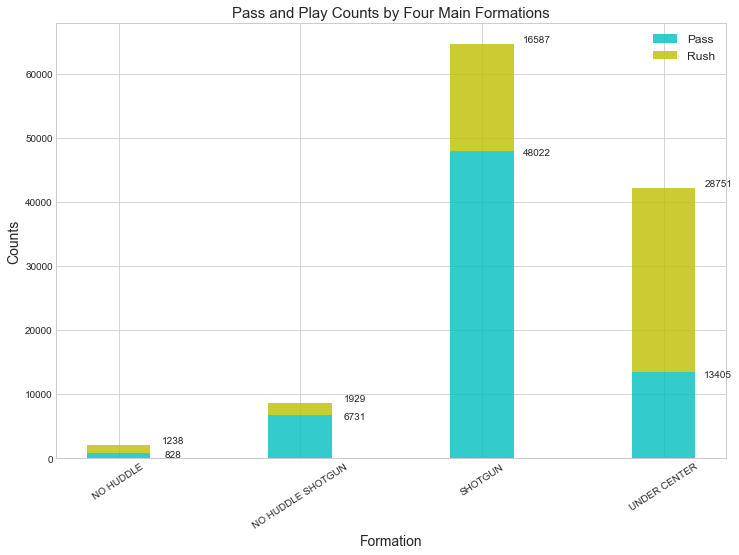

In [37]:
x1 = np.arange(len(df_formation_pass.index))+1
y1 = np.array(list(df_formation_pass['IsPass']))
y2 = np.array(list(df_formation_pass['IsRush']))
xticks1 = list(df_formation_pass.index)
plt.figure(figsize=(12,8))
plt.bar(x1,y1,width = 0.35, align = 'center', color = 'c', alpha = 0.8)
plt.bar(x1,y2,bottom = y1, width = 0.35, align = 'center', color = 'y', alpha = 0.8 )
plt.xticks(x1, xticks1, size = 'medium', rotation = 33)
plt.xlabel('Formation', size = 14)
plt.ylabel('Counts', size = 14)
plt.title('Pass and Play Counts by Four Main Formations', size = 15)
for a,b in zip(x1,y1):
    plt.text(a+0.3, b-1000, '%.0f' % b, ha='center', va='bottom', fontsize=10)
y3 = y1 + y2
i1 = 0
for a,b in zip(x1,y3):
    plt.text(a+0.3, b, '%.0f' % (b - y1[i1]), ha='center', va='bottom', fontsize=10)
    i1 += 1
plt.legend(['Pass','Rush'], loc = 'upper right', fontsize = 12)
# plt.grid()

# Formation Analysis: Formation v.s. Yards
- Next we'd like to see whether different formations differ in Yards.
- First we notice each four main formations have many outliers with large yards.

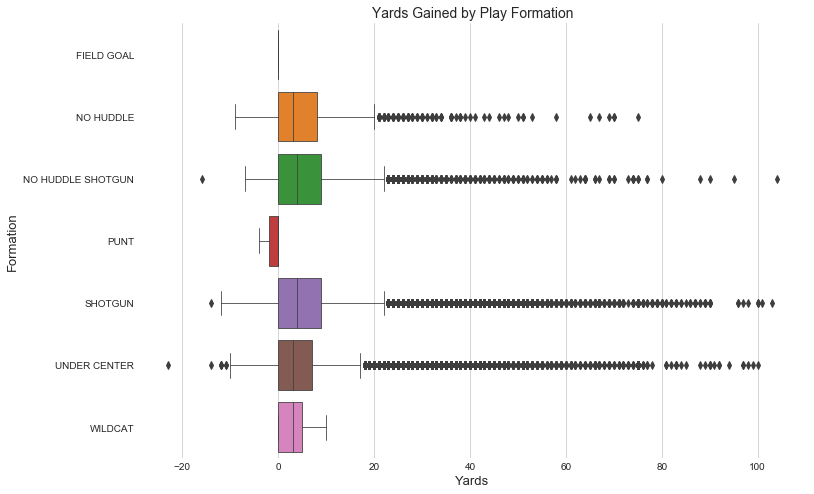

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=df['Formation'].sort_values(ascending=True),
            x=df['Yards'],
            showfliers=True,
            linewidth=.8
            #color='blue'
            )
plt.title('Yards Gained by Play Formation', fontsize=14)
plt.xlabel('Yards', fontsize=13)
plt.ylabel('Formation', fontsize=13)
sns.despine(top=True, right=True, left=True, bottom=True)

- Then if we hide the outliers, we find SHOTGUN formations have a better performance in median (overall) and largest yards than non-SHOTGUN formations. This is consistent with our findings in the histogram of yard and paly types.

Text(0,0.5,'Formation')

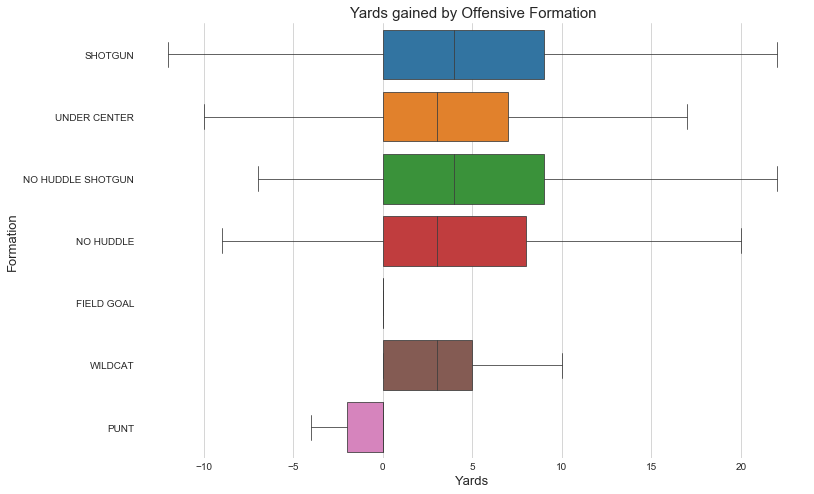

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(-12, 25)
ax.set_title('Yards gained by Offensive Formation', fontsize=15)
sns.boxplot(y=df['Formation'],
            x=df['Yards'],
            showfliers=False,
            linewidth=.8
            #color='blue'
            )
sns.despine(top=True, right=True, left=True, bottom=True)
plt.xlabel('Yards', fontsize=13)
plt.ylabel('Formation', fontsize=13)
# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, .3))


- Why PUNT has negative yard? We printed the description to see the detail of the play.

In [40]:
# for i in range(len(df[df['Formation']=='PUNT'])):
df[df['Formation'] == 'PUNT']['Description'].iloc[2]

'(4:20) (PUNT FORMATION) 6-B.KERN PUNTS 49 YARDS TO JAX 33, CENTER-48-B.BRINKLEY. 12-D.WESTBROOK TO JAX 29 FOR -4 YARDS. PASS BACK TO 84-K.COLE TO JAX 29 FOR NO GAIN (37-A.HOOKER).'

In [41]:
df[df['Formation'] == 'PUNT']['Yards']

109307    0
111900    0
117131   -4
Name: Yards, dtype: int64

# Down Analysis ：Down & Yards & Play Type
- Similar to formation & yards, each down has many outliers both in Pass and Rush plays.
- Later downs are likely to have fewer yards gained, both in Pass and Rush plays.

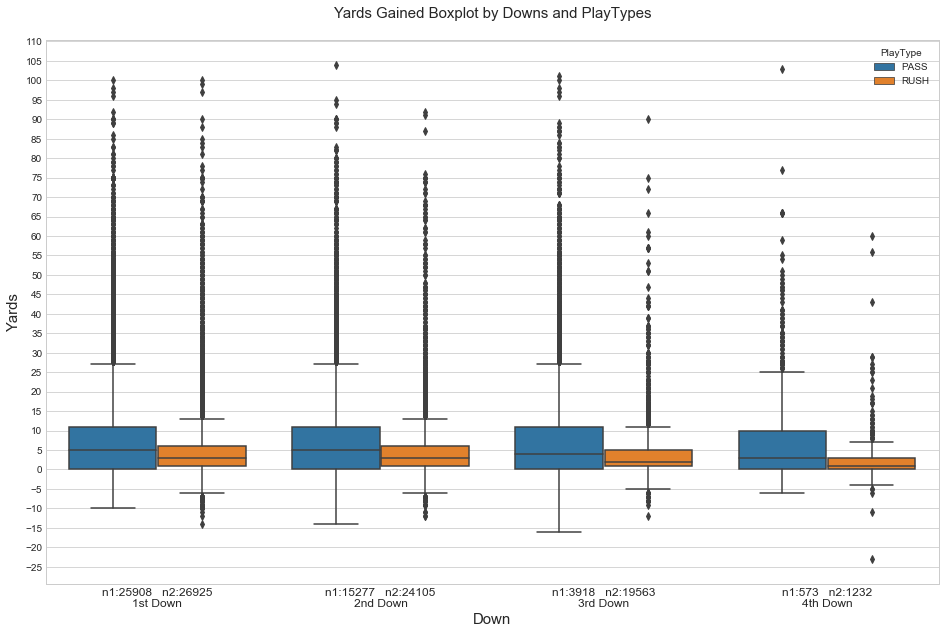

In [42]:
plt.figure(figsize=(16,10))
bp = sns.boxplot(y='Yards', x='Down', 
            data=df, 
            hue='PlayType')

bp.set_xlabel('Down', size = 15)
bp.set_ylabel('Yards', size = 15)
bp.set_title('Yards Gained Boxplot by Downs and PlayTypes\n', fontsize=15)

# compute the number of observations in each group
bpnum_list=[]
for i in range(1,5):
    sublist = []
    sublist.append(len(df[(df['Down']==i) & (df['PlayType']=='RUSH')]))
    sublist.append(len(df[(df['Down']==i) & (df['PlayType']=='PASS')]))
    bpnum_list.append(sublist)
# bpnum_list
down_labels = list(range(4))
down_labels[0] = f'n1:{bpnum_list[0][0]}   n2:{bpnum_list[0][1]}\n1st Down'
down_labels[1] = f'n1:{bpnum_list[1][0]}   n2:{bpnum_list[1][1]}\n2nd Down'
down_labels[2] = f'n1:{bpnum_list[2][0]}   n2:{bpnum_list[2][1]}\n3rd Down'
down_labels[3] = f'n1:{bpnum_list[3][0]}   n2:{bpnum_list[3][1]}\n4th Down'

bp.set_xticklabels([down_labels[0],down_labels[1],down_labels[2],down_labels[3]],size = 12)
bp.yaxis.grid(True)
bp.yaxis.set_major_locator(plt.MultipleLocator(5))



- Now we hide the outliers and the phenomenon is more evident.
- We think 3rd and 4th downs have fewer yards because they're more important in deciding the final result of this series. So both teams are more careful at these 2 downs, the competition is more intense, and yards are generally more difficult to gain.

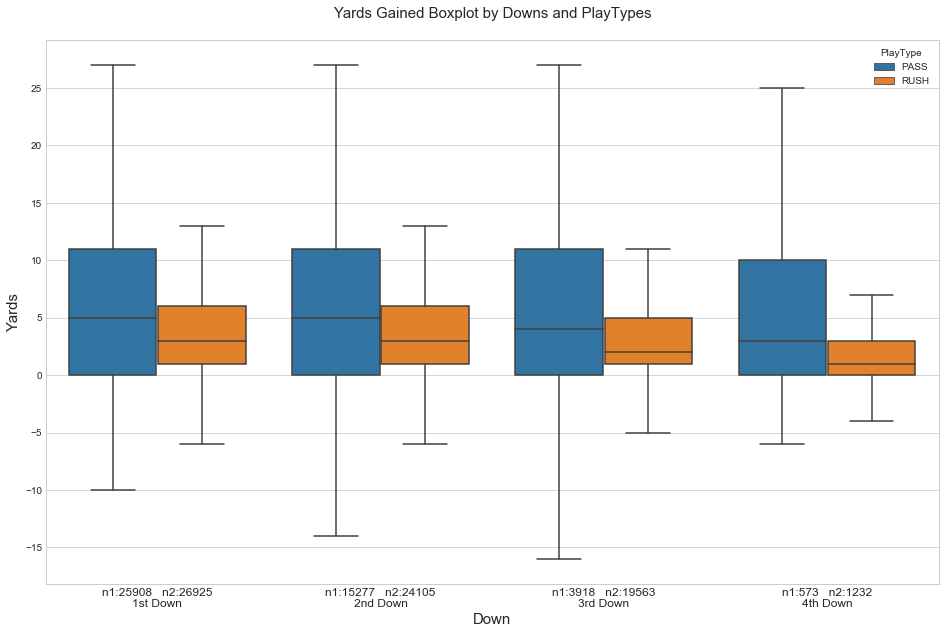

In [43]:
plt.figure(figsize=(16,10))
bp_ = sns.boxplot(y='Yards', x='Down', 
            data=df, 
            showfliers=False,
            hue='PlayType')

bp_.set_xlabel('Down', size = 15)
bp_.set_ylabel('Yards', size = 15)
bp_.set_title('Yards Gained Boxplot by Downs and PlayTypes\n', fontsize=15)

# compute the number of observations in each group
bpnum_list=[]
for i in range(1,5):
    sublist = []
    sublist.append(len(df[(df['Down']==i) & (df['PlayType']=='RUSH')]))
    sublist.append(len(df[(df['Down']==i) & (df['PlayType']=='PASS')]))
    bpnum_list.append(sublist)
# bpnum_list
down_labels = list(range(4))
down_labels[0] = f'n1:{bpnum_list[0][0]}   n2:{bpnum_list[0][1]}\n1st Down'
down_labels[1] = f'n1:{bpnum_list[1][0]}   n2:{bpnum_list[1][1]}\n2nd Down'
down_labels[2] = f'n1:{bpnum_list[2][0]}   n2:{bpnum_list[2][1]}\n3rd Down'
down_labels[3] = f'n1:{bpnum_list[3][0]}   n2:{bpnum_list[3][1]}\n4th Down'

bp_.set_xticklabels([down_labels[0],down_labels[1],down_labels[2],down_labels[3]],size = 12)
bp_.yaxis.grid(True)
bp_.yaxis.set_major_locator(plt.MultipleLocator(5))



# Down Analysis ：Down v.s. Formation
- Finding 1: The number of each downs seem to decrease.
- Finding 2: Teams are more likely to use UNDER CENTER in the first downs, they're less likely to use it in later downs. Instead, they use more SHOTGUNs.

Text(0,0.5,'Counts of Formation')

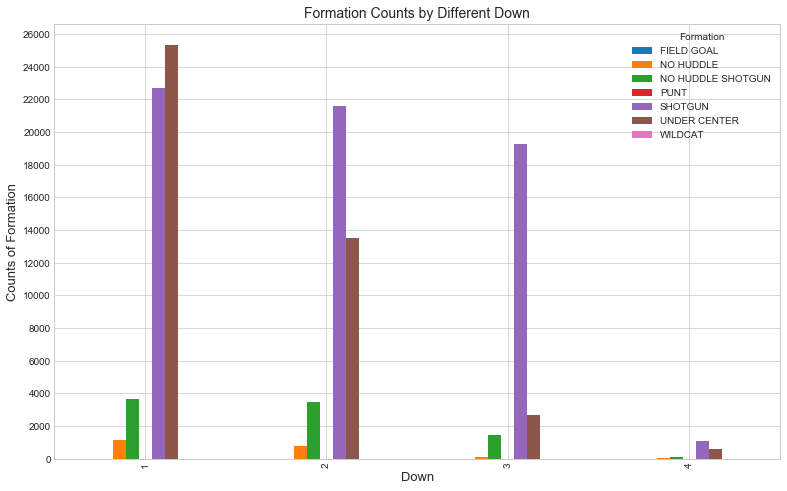

In [44]:
down_formation_group = df.groupby(['Down','Formation'])
# down_formation_group.size().unstack().plot(kind = 'bar',figsize=(16,8),color=['r', 'b', 'k', 'c', 'm', 'g', 'y'])
# formation_group.size().unstack().plot(kind = 'bar',figsize=(16,8))
down_formation_group = down_formation_group.size().unstack().plot(kind = 'bar',figsize=(13,8))
down_formation_group.yaxis.set_major_locator(plt.MultipleLocator(2000))
down_formation_group.yaxis.grid(True)
plt.title('Formation Counts by Different Down', fontsize = 14)
plt.xlabel('Down', fontsize = 13)
plt.ylabel('Counts of Formation', fontsize = 13)


- We further confirmed the number of each down. This may happen because of two reasons.
- <b>Reason 1</b>: Teams successfully gain 10 yards and enter the next series of play (starting from a new 1st down) in the 1st and 2nd down. So there won't be so many 3rd and 4th downs. This is the main reason.
- <b>Reason 2</b>: Teams may have fumble that leads to the change of possession of the ball. So their play ends at 1st or 2nd or 3rd down and won't get to the 4th down.

Text(0,0.5,'Counts')

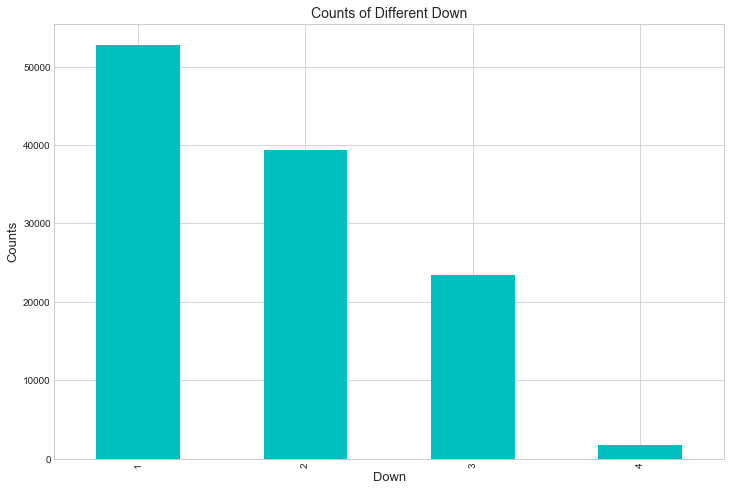

In [45]:
df.groupby(['Down']).size().plot(kind = 'bar', color = 'c', width = .5, figsize=(12,8))
plt.title('Counts of Different Down', fontsize = 14)
plt.xlabel('Down', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)

# Trend of different season (2019 as of 11/24/19)
- Play type: Choice in play type is steady. No big change is observed.
- Formation: We notice a slight decrease use of NO HUDDLE SHOTGUN formation from 2016 to 2018. The trend of other three formations is more mixed.

Text(0.5,1,'PlayType Times by SeasonYear (2019 as of 11/24/19)')

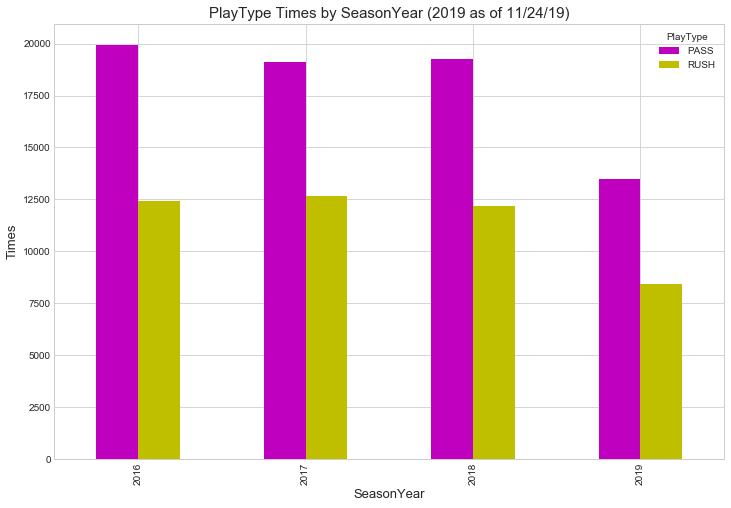

In [46]:
formation_playtype_group = df.groupby(['SeasonYear','PlayType'])
fpg = formation_playtype_group.size().unstack().plot(kind = 'bar',figsize=(12,8), color = ['m','y'])
fpg.set_xlabel('SeasonYear', size = 13)
fpg.set_ylabel('Times', size = 13)
fpg.set_title('PlayType Times by SeasonYear (2019 as of 11/24/19)', fontsize=15)


Text(0.5,1,'Formation by SeasonYear (2019 as of 11/24/19)')

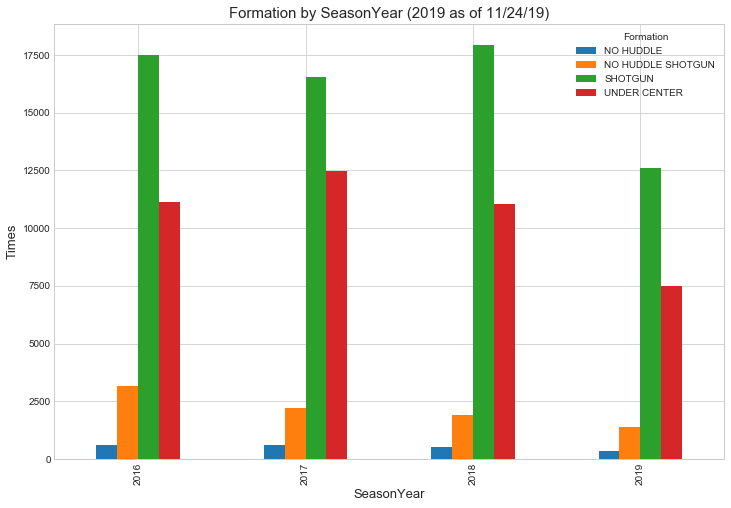

In [47]:
df_season_formation = df.drop(index = df[(df['Formation']=='FIELD GOAL') | (df['Formation']=='WILDCAT') | (df['Formation']=='PUNT')].index)
formation_playtype_group2 = df_season_formation.groupby(['SeasonYear','Formation'])
fpg2 = formation_playtype_group2.size().unstack().plot(kind = 'bar',figsize=(12,8))
fpg2.set_xlabel('SeasonYear', size = 13)
fpg2.set_ylabel('Times', size = 13)
fpg2.set_title('Formation by SeasonYear (2019 as of 11/24/19)', fontsize=15)


# Comparison of different teams
- Play type: All teams have more pass plays than rush plays. The ratio of pass:rush is roughly a bit less than 3:2.
- Formation: Most teams use SHOTGUN (pass play) most frequently, except for Atlanta Falcons, Los Angeles Rams, and New England Portraits.

Text(0,0.5,'Counts')

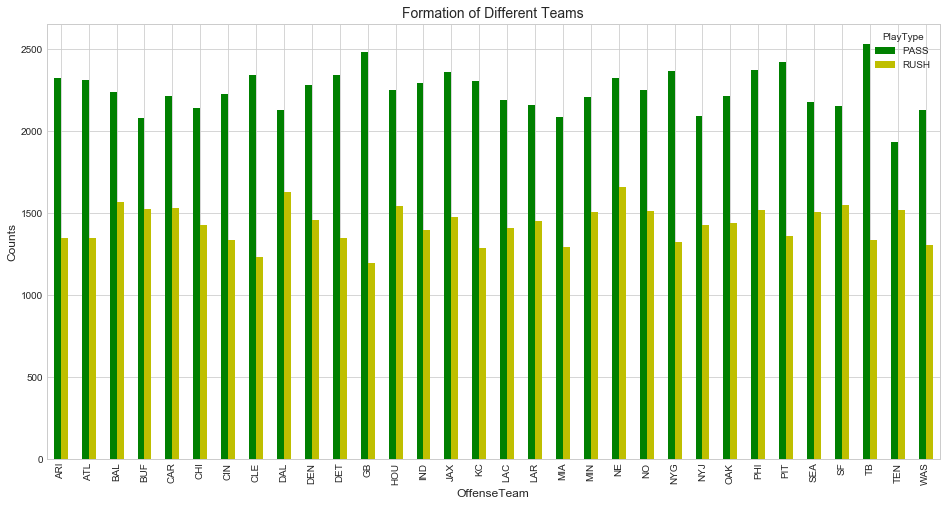

In [48]:
df_team_playtype = df
playtype_group = df_team_playtype.groupby(['OffenseTeam','PlayType'])
playtype_group.size().unstack().plot(kind = 'bar',figsize=(16,8),color=['g', 'y'])
plt.title('Formation of Different Teams', fontsize = 14)
plt.xlabel('OffenseTeam', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)

In [49]:
df_team_formation = df.drop(index = df[(df['Formation']=='FIELD GOAL') | (df['Formation']=='WILDCAT') | (df['Formation']=='PUNT')].index)
print(len(df_team_formation))
print(len(df))

117491
117501


Text(0,0.5,'Counts')

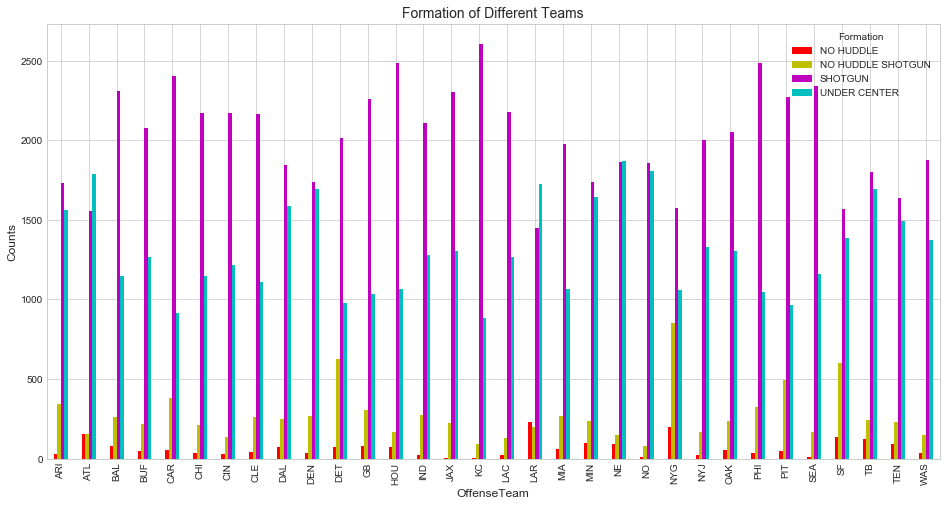

In [50]:
formation_group = df_team_formation.groupby(['OffenseTeam','Formation'])
formation_group.size().unstack().plot(kind = 'bar',figsize=(16,8),color=['r','y', 'm', 'c'])
plt.title('Formation of Different Teams', fontsize = 14)
plt.xlabel('OffenseTeam', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
# formation_group.size().unstack().plot(kind = 'bar',figsize=(16,8))

In [51]:
# df['remaining_test'] = numpy.where(df['Remaining'] < 0, 900 - df['Remaining'],numpy.NaN)
# df['remaining_test'].unique()
# df = df.drop(columns = 'remaining_test')
# print(len(df[df['remaining_test']==900]))

# ToGo (Yards to get the 1st down) & Yards
- From the scatter plot it's hard to find obvious linear relationship between these two features. We could vaguely tell the relationship is somewhat negative, since larger DistancetoGo seems to have smaller yards of the play.

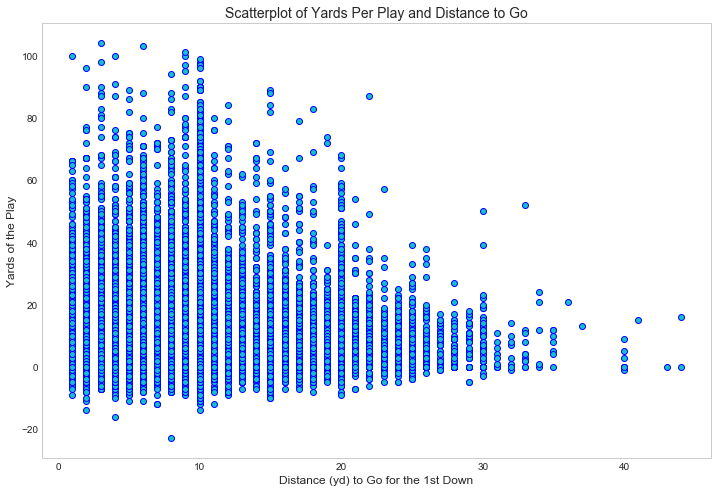

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(df['ToGo'], df['Yards'], c = '#17becf', edgecolors='b' )
plt.ylabel('Yards of the Play', fontsize = 12)
plt.xlabel('Distance (yd) to Go for the 1st Down', fontsize = 12)
plt.title('Scatterplot of Yards Per Play and Distance to Go', fontsize = 14)
plt.grid(False)
plt.show()